# Ôn tập giữa kỳ


In [1]:
# import library...
# ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [3]:
df = pd.read_csv('../on/brfss_2000.csv',header = 0)

df.shape

(20000, 9)

### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [24]:
#a
df.head(10)
f,m = df.groupby('gender')['gender'].agg(['count']).values
total = f+m
nam = m/total
nu = 1 - nam

print(f"Tỷ lệ nam là : {nam*100}")
print(f"Tỷ lệ nữ là : {nu*100}")

#b

df.head(10)
poor = df[(df['exerany'] == 1) & (df['genhlth'] == 'poor')]['genhlth'].agg(['count']).values
total = df[(df['exerany'] == 1)]['genhlth'].agg(['count']).values
tyle = poor/total
print(f"Tỷ lệ những người tự đánh giá có sức khỏe kém là : {tyle}")

Tỷ lệ nam là : [47.845]
Tỷ lệ nữ là : [52.155]
Tỷ lệ những người tự đánh giá có sức khỏe kém là : [0.01964597]


### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [34]:
#a
df['height_cm'] = df['height'] * 2.54
df['weight_kg'] = df['weight'] / 2.20462

#b
nguoigiamcan = df[df['weight'] > df['wtdesire']]['age'].agg(['count']).values
tyle = nguoigiamcan / df.shape[0]

print(f"Tỷ lệ những người muốn giảm cân {tyle}")

Tỷ lệ những người muốn giảm cân [0.6382]


### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18716\1685939204.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x=[data1['weight']], labels=['data1'])


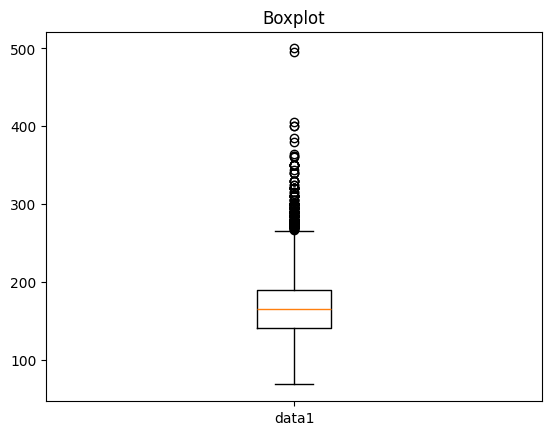

In [37]:
#a) Các biến có phân phối chuẩn thường là các biến liên tục, có giá trị tập trung quanh trung bình và phân bố đối xứng (height, weight, w)

#b
data1 = df[df['exerany'] == 1]     

plt.boxplot(x=[data1['weight']], labels=['data1'])
plt.title("Boxplot")

plt.show()



### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



Tỷ lệ người tham gia hút thuốc [0.47205]


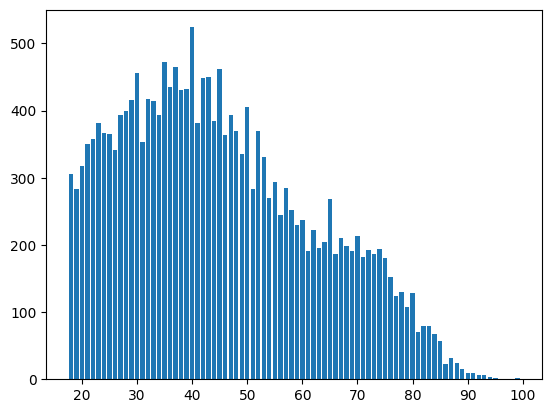

In [ ]:
smoke = df[df['smoke100'] == 1]['smoke100'].agg(['count']).values
total = df.shape[0]
tyle = smoke/total
print(f"Tỷ lệ người tham gia hút thuốc {tyle}")
data = df.groupby('age')['smoke100'].agg(['count']).reset_index()


plt.bar(data['age'],data['count'])
plt.show()

### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



In [47]:
df['BMI'] = df['weight_kg'] / pow(df['height_cm'] /100,2)

bminam = df[df['gender'] == 'm']['BMI'].agg(['mean']).values
bminu = df[df['gender'] == 'f']['BMI'].agg(['mean']).values

print(f"Chỉ số BMI trung cho nam là {bminam}")
print(f"Chỉ số BMI trung bình cho nữ là {bminu}")

Chỉ số BMI trung cho nam là [26.92636658]
Chỉ số BMI trung bình cho nữ là [25.74372573]


### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

In [57]:
df['isFat'] = df['BMI'] >=30

df.groupby(['gender','age'])['isFat'].agg(['mean'])


mean
gender age          
f      18   0.068966
       19   0.069444
       20   0.099448
       21   0.098765
       22   0.100000
...              ...
m      90   0.000000
       91   0.000000
       92   0.000000
       93   0.000000
       94   0.000000

[158 rows x 1 columns]

---